In [53]:
import joblib
import gmaps
from dotenv import load_dotenv
load_dotenv()
toronto_coord = (43.651070,-79.347015)
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

origin = (43.660849, -79.295494) # 27 King's College Cir, Toronto, ON M5S
dst = (43.64764,-79.398266) # 484 Richmond St W, Toronto, ON M5V 1Y2
maps = googlemaps.Client(key=os.environ['GOOGLE_API_KEY'])
figs = gmaps.figure(center=toronto_coord,zoom_level=11)

In [25]:
def con_gps(addr):
    import googlemaps
    maps = googlemaps.Client(key=os.environ['GOOGLE_API_KEY'])
    res = maps.geocode(addr)[0]
    lat, long = res['geometry']['location'].values()
    return float(lat), float(long)

# Calculate Midpoint and Radius
def calc_midpt_radius(latitude1, longitude1, latitude2, longitude2):
    earth_radius = 3959*5280.0
    
    Lat1 = (latitude1)*(np.math.pi/180.0)
    Long1 = (longitude1)*(np.math.pi/180.0)
    Lat2 = (latitude2)*(np.math.pi/180.0)
    Long2 = (longitude2)*(np.math.pi/180.0)
    
    dist = 2.0*earth_radius*np.arcsin(np.sqrt(np.power(np.math.sin((Lat2 - Lat1)/2.0),2.0)+np.math.cos(Lat1)*np.math.cos(Lat2)*np.power(np.math.sin((Long2 - Long1)/2.0),2.0)))
    #dis = np.sqrt((Lat1-Lat2)**2 +(Long1-Long2)**2)
    radius = dist/2.0
    #radius = radius+100.0
    
    mid_lat = (latitude1+latitude2)/2.0
    mid_long = (longitude1+longitude2)/2.0
            
    return mid_lat, mid_long, radius
   # returns center coordinate and radius in ft (plus 100 ft)

In [28]:
lat1, long1 = con_gps("27 King's College Cir, Toronto, ON M5S")
lat2, long2 = con_gps("484 Richmond St W, Toronto, ON M5V 1Y2")
midlat, midlong, r = calc_midpt_radius(lat1, long1, lat2, long2)

In [35]:
midlat, midlong, r

(43.65430404999999, -79.39691214999999, 2416.981016102055)

In [49]:
res = maps.reverse_geocode((midlat, midlong))
for item in res:
    with open('output_loc.txt', 'a') as f:
        f.write(f"{item['geometry']['location']['lat']},{item['geometry']['location']['lng']}\n")

In [60]:
s_loc_t = np.genfromtxt("./output_loc.txt", delimiter=',', dtype=float)
s_loc_t

array([[  43.654304 ,  -79.3969122],
       [  43.6543878,  -79.3969242],
       [  43.654296 ,  -79.396791 ],
       [  43.6541698,  -79.3967243],
       [  43.6541982,  -79.3970905],
       [  43.6543596,  -79.3973226],
       [  43.6537341,  -79.3930124],
       [  43.6532057,  -79.4000493],
       [  43.6486795,  -79.3803231],
       [  43.653226 ,  -79.3831843],
       [  43.6689775,  -79.2902133],
       [  51.253775 ,  -85.323214 ],
       [  56.130366 , -106.346771 ],
       [  43.654304 ,  -79.3969122]])

In [61]:
!cat ./output_loc.txt ./models/gmm.txt

43.654304,-79.3969122
43.65438779999999,-79.3969242
43.654296,-79.396791
43.6541698,-79.3967243
43.6541982,-79.39709049999999
43.6543596,-79.3973226
43.6537341,-79.3930124
43.6532057,-79.40004929999999
43.6486795,-79.3803231
43.653226,-79.3831843
43.6689775,-79.29021329999999
51.253775,-85.323214
56.130366,-106.346771
43.654304,-79.3969122
0.2994272775495866
[43.74629864304019,-79.27166193648964]
[[0.00172539 0.00115345]
 [0.00115345 0.00339242]]


In [56]:
df = pd.read_csv('data/assault_lat_long.csv')
loc = list(df.to_records(index=False))

In [57]:
figs.add_layer(gmaps.heatmap_layer(loc))
figs.add_layer(gmaps.directions_layer((lat1,long1), (lat2, long2), travel_mode='WALKING'))

In [58]:
figs

Figure(layout=FigureLayout(height='420px'))

---

In [2]:
kept = ['offence', 'Neighbourhood', 'Long', 'Lat']
data = pd.read_csv("data/Assault.csv")
data.head()

/home/aarnphm/.pyenv/versions/3.8.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,premises_type,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.862342e+06,5.424014e+06,40118,GO-2015910621,D23,2015/05/31 15:42:00+00,2015/05/31 15:42:00+00,Apartment,1420,100,Assault With Weapon,2015,May,31,151,Sunday,15,2015.0,May,31.0,151.0,Sunday,15,Assault,1,West Humber-Clairville (1),-79.611774,43.731689,1
1,-8.861463e+06,5.425856e+06,40344,GO-2015928800,D23,2015/06/03 12:38:00+00,2015/06/03 12:39:00+00,Commercial,1420,100,Assault With Weapon,2015,June,3,154,Wednesday,12,2015.0,June,3.0,154.0,Wednesday,12,Assault,1,West Humber-Clairville (1),-79.603876,43.743642,2
2,-8.857188e+06,5.420543e+06,40348,GO-2015929386,D23,2015/05/27 16:00:00+00,2015/06/03 14:11:00+00,Other,1430,100,Assault,2015,June,3,154,Wednesday,14,2015.0,May,27.0,147.0,Wednesday,16,Assault,1,West Humber-Clairville (1),-79.565476,43.709154,3
3,-8.861665e+06,5.423589e+06,40371,GO-2015930623,D23,2015/06/03 17:35:00+00,2015/06/03 17:37:00+00,Outside,1410,100,Aggravated Assault,2015,June,3,154,Wednesday,17,2015.0,June,3.0,154.0,Wednesday,17,Assault,1,West Humber-Clairville (1),-79.605691,43.728929,4
4,-8.861665e+06,5.423589e+06,40372,GO-2015930623,D23,2015/06/03 17:35:00+00,2015/06/03 17:37:00+00,Outside,1420,100,Assault With Weapon,2015,June,3,154,Wednesday,17,2015.0,June,3.0,154.0,Wednesday,17,Assault,1,West Humber-Clairville (1),-79.605691,43.728929,5


In [3]:
data = data[data['occurrenceyear']>=2017]
# data = data[data.offence.str.contains('Assault')]
data = data[~data.offence.str.contains("Weapon")]

In [4]:
finals = data.loc[:, kept]
finals

,offence,Neighbourhood,Long,Lat
600,Assault,West Humber-Clairville (1),-79.576355,43.731668
603,Assault,West Humber-Clairville (1),-79.613307,43.732178
604,Aggravated Assault,West Humber-Clairville (1),-79.599412,43.730910
608,Discharge Firearm With Intent,West Humber-Clairville (1),-79.611774,43.731689
610,Discharge Firearm With Intent,West Humber-Clairville (1),-79.611774,43.731689
...,...,...,...,...
130353,Assault,NSA,-79.115658,43.819531
130354,Assault,NSA,-79.235481,43.877722
130355,Assault,NSA,-79.656869,43.586366
130356,Assault,NSA,-78.894412,44.170111


In [5]:
finals.offence.unique()

array(['Assault', 'Aggravated Assault', 'Discharge Firearm With Intent',
       'Assault Bodily Harm', 'Pointing A Firearm',
       'Assault - Resist/ Prevent Seiz', 'Use Firearm / Immit Commit Off',
       'Discharge Firearm - Recklessly', 'Assault Peace Officer',
       'Administering Noxious Thing', 'Assault - Force/Thrt/Impede',
       'Assault Peace Officer Wpn/Cbh', 'Disarming Peace/Public Officer',
       'Crim Negligence Bodily Harm', 'Air Gun Or Pistol: Bodily Harm',
       'Aggravated Aslt Peace Officer', 'Unlawfully Causing Bodily Harm',
       'Aggravated Assault Avails Pros', 'Set/Place Trap/Intend Death/Bh'],
      dtype=object)

In [6]:
fin = finals.loc[finals['offence'].isin(['Assault', 'Aggravated Assault','Assault Bodily Harm','Assault - Resist/ Prevent Seiz','Assault - Force/Thrt/Impede','Crim Negligence Bodily Harm','Unlawfully Causing Bodily Harm'])]
fin.offence.unique()

array(['Assault', 'Aggravated Assault', 'Assault Bodily Harm',
       'Assault - Resist/ Prevent Seiz', 'Assault - Force/Thrt/Impede',
       'Crim Negligence Bodily Harm', 'Unlawfully Causing Bodily Harm'],
      dtype=object)

In [7]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57645 entries, 600 to 130357
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   offence        57645 non-null  object 
 1   Neighbourhood  57645 non-null  object 
 2   Long           57645 non-null  float64
 3   Lat            57645 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.2+ MB


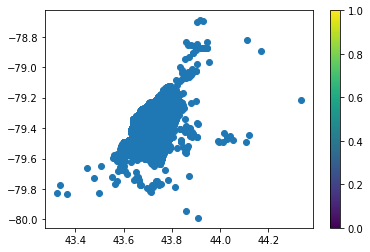

In [8]:
plt.scatter(fin['Lat'], fin['Long'])
plt.colorbar()
plt.show()

In [9]:
latlong = fin[['Lat', 'Long']]

In [10]:
latlong.to_csv("data/assault_lat_long.csv", index=False, header=False)

---

In [62]:
from pyspark import SparkContext
sc = SparkContext()

21/09/19 02:02:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [63]:
from pyspark.mllib.clustering import GaussianMixture

In [64]:
data = sc.textFile("./data/assault_lat_long.csv")

In [65]:
parsed = data.map(lambda line: np.array([float(x) for x in line.strip().split(',')]))
l=6

In [66]:
gmm = GaussianMixture.tra(parsed, l)

21/09/19 02:03:01 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
21/09/19 02:03:01 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK
21/09/19 02:03:01 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/09/19 02:03:01 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [69]:
for j in range(0,l):
    with open(f"./models/gmm_{j}.txt", 'w') as f:
        f.write(str(gmm.weights[j])+"\n")
        f.write(str(gmm.gaussians[j].mu) + "\n")
        f.write(str(gmm.gaussians[j].sigma.toArray())+'\n')

In [72]:
!cat ./models/gmm_1.txt

0.17388597327363656
[43.70529930597177,-79.49724923503747]
[[0.00149265 0.00037961]
 [0.00037961 0.00278214]]


In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(df.values)

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

joblib.dump(kmeans, "models/kmeans.pkl")

In [ ]:
figs

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(X)

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta' )
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black' )



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of areas')
plt.xlabel('factor1')
plt.ylabel('factor2')
plt.legend()
plt.show()